In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Define a function for image augmentation

In [2]:
def Image_Augmentation(x):
    # Affine Transformation
    '''
    ip = np.random.uniform(5,15)#inclination point
    pts1 = np.float32([[20,5],[5,20],[25,20]])#(y,x)
    pts2 = np.float32([[20,ip],[5,20],[25,20]])
    M = cv2.getAffineTransform(pts1,pts2)
    x = cv2.warpAffine(x,M,(x.shape[1],x.shape[0]))
    '''
    # Rotation
    ri = np.random.randint(0,4)
    angle=[0,90,180,270]
    scale=[1.0,1.1,1.1,1.1]
    M = cv2.getRotationMatrix2D((x.shape[1]/2,x.shape[0]/2),angle[ri],scale[ri])
    x = cv2.warpAffine(x,M,(x.shape[1],x.shape[0]))
    # Perspective Transformation
    pr = -np.random.randint(0,2)
    pts1 = np.float32([[5,5],[25,5],[5,25],[25,25]])
    pts2 = np.float32([[5+pr,5+pr],[25-pr,5+pr],[5+pr,25-pr],[25-pr,25-pr]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    x = cv2.warpPerspective(x,M,(x.shape[1],x.shape[0]))
    # Flipping 0
    r0 = np.random.randint(0,2)
    if r0==1:
        x = x[:,::-1]
    # Flipping 1
    r1 = np.random.randint(0,2)
    if r1==1:
        x = x[::-1,:]
    # Add noise
    x = x + np.random.randint(0,2,(x.shape[0],x.shape[1]))
    x = np.where(x>255,255,x)
    #x = np.where(x<0,0,x)
    #x = cv2.resize(x, (30, 30))
    return x

## Test the function

In [3]:
img = cv2.imread('star.jpg',0)

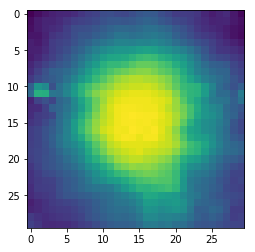

In [4]:
plt.imshow(img)
plt.show()

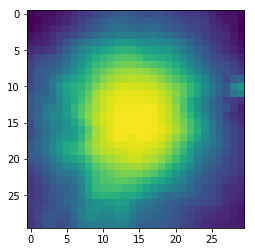

In [5]:
plt.imshow(Image_Augmentation(img))
plt.show()

## Augment sample images of stars and empty space

In [6]:
k=1
for i in range(1,23):
    img = cv2.imread('sample_stars/object_%d.jpg'%i,0)
    for j in range(1,47):
        aug_img = Image_Augmentation(img)
        cv2.imwrite('augmented_images_of_stars/object_%d.jpg'%k, aug_img, params=None)
        k+=1

In [7]:
k=1
for i in range(1,23):
    img = cv2.imread('sample_empty_space/object_%d.jpg'%i,0)
    for j in range(1,47):
        aug_img = Image_Augmentation(img)
        cv2.imwrite('augmented_images_of_empty_space/object_%d.jpg'%k, aug_img, params=None)
        k+=1